# Laboratorio 3

**Integrantes:**

- Juan Felipe Peña Criado (201426463) 
- Juan Diego González Gómez (201911031) 
- Sergio Ramírez Vélez (201714577)

## 0. Importación de librerías y carga de datos

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [2]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook
db_location = "202210_Laboratorio3_data_DatosTrain.csv"

# Se leen los datos, estan separados con ','
data = pd.read_csv(db_location, sep=',', encoding = 'utf-8', na_values = '-')

## 1. Entendimiento de los datos

In [3]:
# Se revisa la forma general de los datos cargados
data.shape

(2644, 20)

In [4]:
# Se muestra una pequeña muestra de los datos
data.head()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
data.dtypes

Unnamed: 0                           int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
# Se hace una decripción de los datos
data.describe()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.00000,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,1321.50000,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,763.40138,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,660.75000,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,1321.50000,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,1982.25000,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,2643.00000,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# Se observa que no existen valores nulos en las variables
data.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## 2. Identificación de variables a utilizar

<AxesSubplot:>

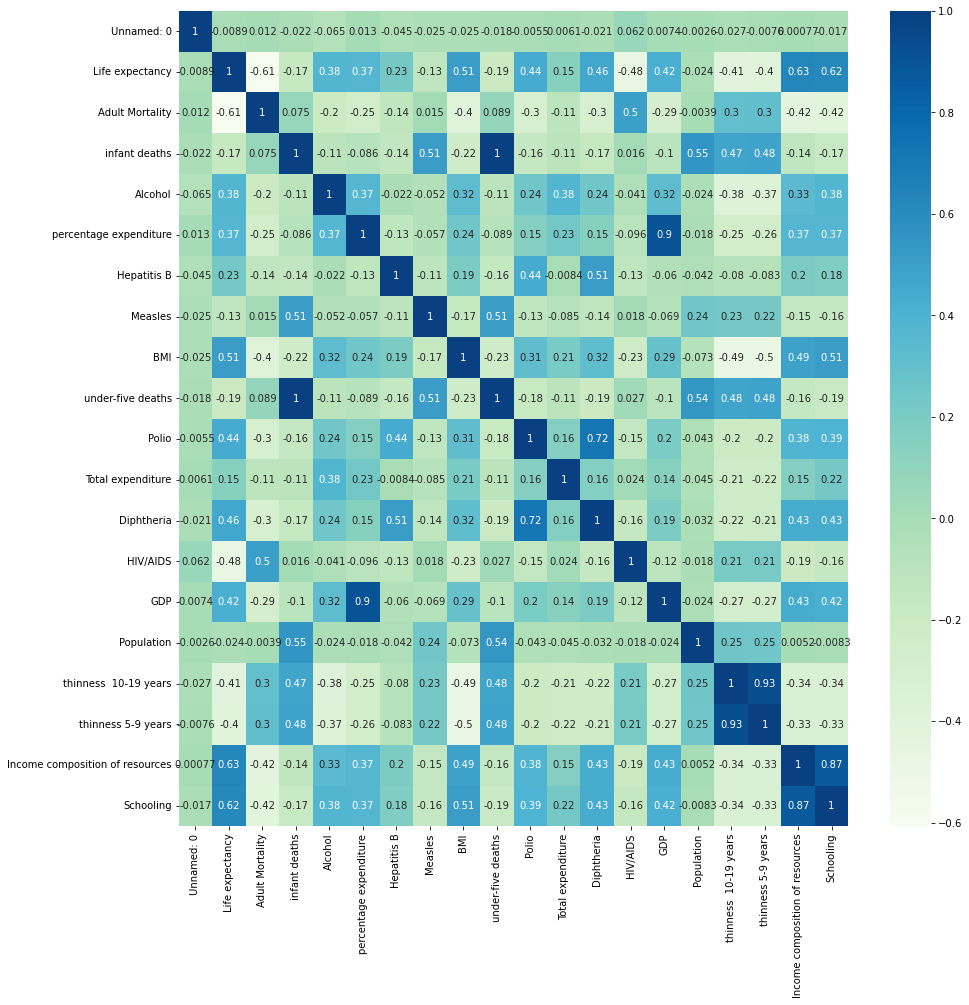

In [8]:
# Se revisa si la variable objetivo está correlacionada con otra variable
plt.figure(figsize =(15,15))
correlacion = data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

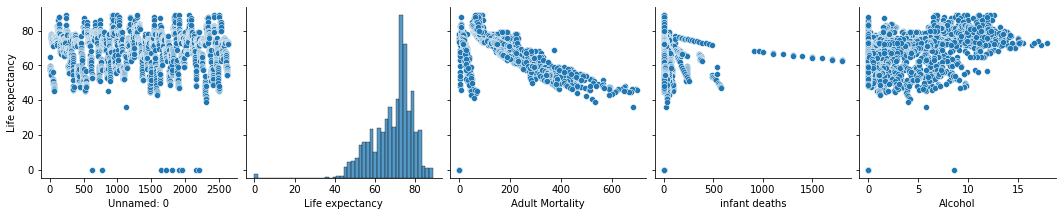

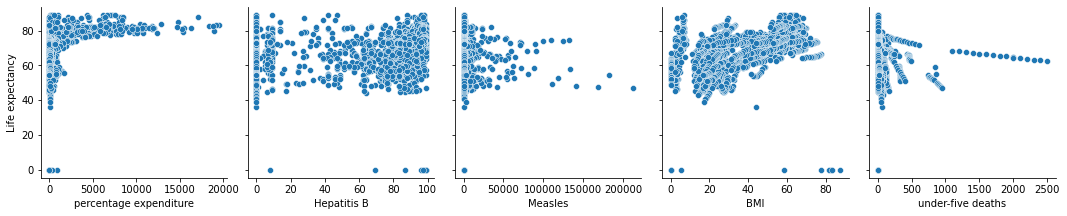

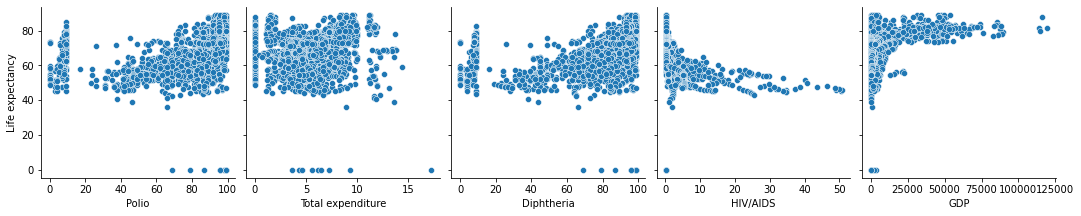

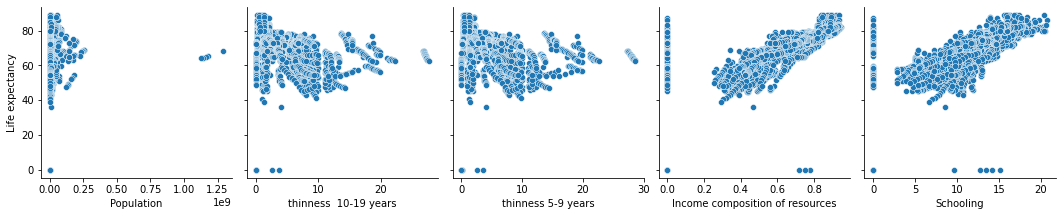

In [9]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
sns.pairplot(data, height=3, y_vars = 'Life expectancy', x_vars = data.columns[0:5], kind='scatter')
sns.pairplot(data, height=3, y_vars = 'Life expectancy', x_vars = data.columns[5:10], kind='scatter')
sns.pairplot(data, height=3, y_vars = 'Life expectancy', x_vars = data.columns[10:15], kind='scatter')
sns.pairplot(data, height=3, y_vars = 'Life expectancy', x_vars = data.columns[15:], kind='scatter')

Se puede apreciar que Income composition of resources y Schooling son dos variables con una relación directamente proporcional fuerte con nuestra variable objetivo. Del mismo modo, Adult Mortality parece tener una relación indirecta con la variable objetivo. Adicionalmente, estas variables tienen un coeficiente de correlación cercano a +-0.6, por lo que son lo suficientemente explicativas sin estar totalmente correlacionadas

Por estos motivos, se eligen estas tres variables para realizar el modelo: 'Adult Mortality', 'Income composition of resources' y 'Schooling'.

In [10]:
selected_cols = ['Adult Mortality','Income composition of resources','Schooling']

## 3. Limpieza y preparación de datos

In [11]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Life expectancy", data["Life expectancy"])

In [12]:
# Se eliminan los registros que tienen la variable objetivo nula o en un valor de 0, ya que son datos atípicos
df_data = df_data.dropna(subset = ['Life expectancy'])
df_data = df_data.drop(df_data[df_data['Life expectancy'] == 0].index)

Como se pudo observar en la sección #1, los datos cumplen con las especificaciones dadas por el negocio en el diccionario de datos, por lo que no se realiza ninguna limpieza adicional. Más adelante, dependiendo de como los valores atípicos (outliers) afecten el modelo, es posible que se realizen pequeñas modificaciones adicionales.

## 4. Modelamiento

### Pipeline 1: solo con selección de variables

In [13]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]
# Se declara el modelo
model = [('model', LinearRegression())]
# Se declara el pipeline
pipeline1 = Pipeline(pre+model)

In [14]:
# Se extraen las variables explicativas y objetivo para entrenar
df_datap1 = df_data
X = df_datap1.drop('Life expectancy', axis = 1)
Y = df_datap1['Life expectancy']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline1 = pipeline1.fit(X_train,Y_train)

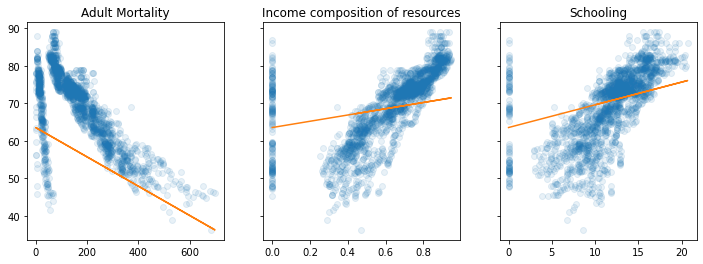

In [15]:
# Se visualiza la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):
    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline1['model'].coef_[pos_col]
    # Interceto
    b = pipeline1['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [16]:
# Vale la pena hacer estandarización de los datos para tener coeficientes más comparables en misma escala.
importancia = pipeline1['model'].coef_
pd.options.display.float_format = '{:.5f}'.format
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,8.34773
1,Schooling,0.60541
2,Adult Mortality,-0.03907


In [17]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline1.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #1 - Datos de entrenamiento
RMSE: 5.65
R²: 0.65


In [18]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline1.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #1 - Datos de test
RMSE: 5.53
R²: 0.64


<AxesSubplot:>

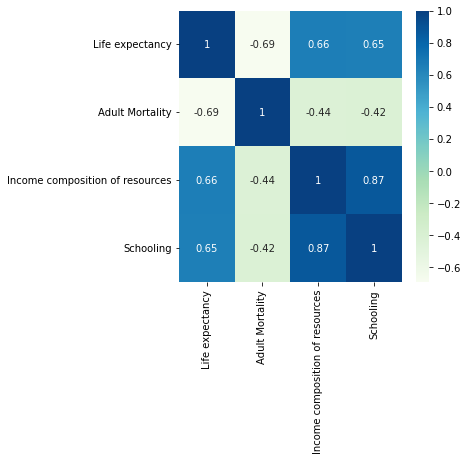

In [19]:
# Se revisa la colinealidad
df_temp = df_datap1[selected_cols]
plt.figure(figsize =(5,5))
correlacion = df_datap1.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

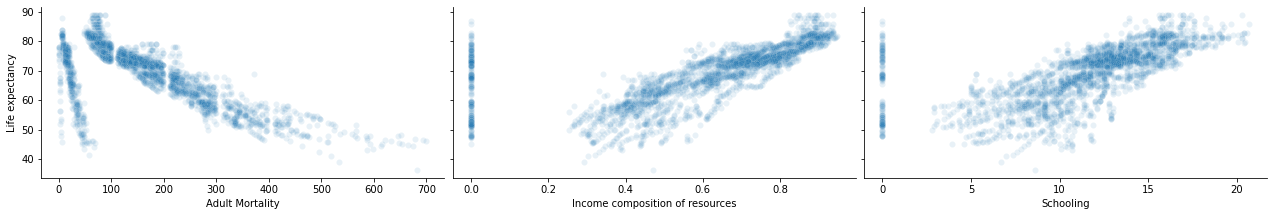

In [20]:
# Linealidad
#Se ven datos relativamente juntos, sin embargo, hay una pequeña cantidad de datos fuera de esta cohesión en las tres variables.
sns.pairplot(df_datap1, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

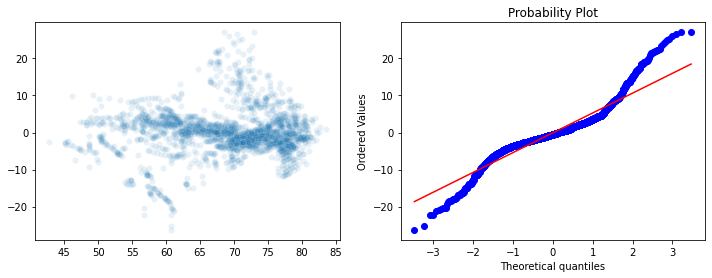

In [21]:
# Nos sirve para revisar si los errores vienen con una distribución teoríca. En este caso, de una distribución normal.
X = df_data.drop('Life expectancy', axis = 1)
y = df_data['Life expectancy']

# Calculamos los errores
errors = (pipeline1.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Los errores extremos están menos poblados en la distribución (thick tail).

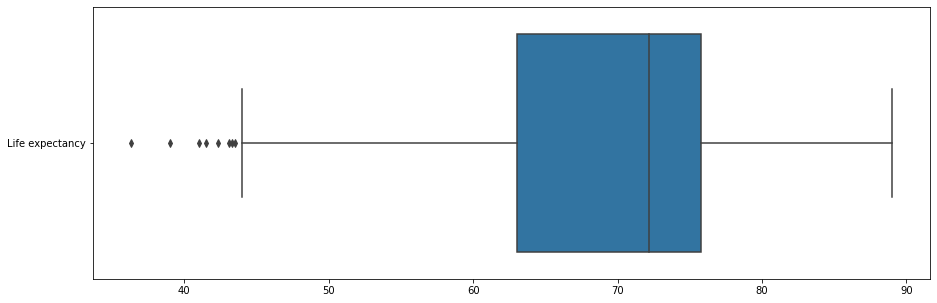

In [22]:
# Diagrama de caja
# Acá podemos ver los valores atípicos de Life expectancy.
# En este caso están los menores a 44.5.
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap1[['Life expectancy']], orient="h")

 ### Pipeline 2: Modelo con eliminación de valores atípicos en la variable objetivo y estandarización

In [23]:
# Se eliminan los valores atípicos que indica el diagrama de caja.
df_datap2 = df_data
df_datap2 = df_datap2.drop(df_datap2[df_datap2['Life expectancy'] < 44.5].index)
df_datap2 = df_datap2.drop(df_datap2[df_datap2['Life expectancy'] > 88].index)

In [24]:
# Se declara el modelo
model2 = [('model2', LinearRegression())]

#Pre
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('scaler', StandardScaler()),]

# Se declara el pipeline
pipeline2 = Pipeline(pre+model2)

# Se extraen las variables explicativas y objetivo para entrenar
X = df_datap2.drop('Life expectancy', axis = 1)
Y = df_datap2['Life expectancy']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline2 = pipeline2.fit(X_train,Y_train)

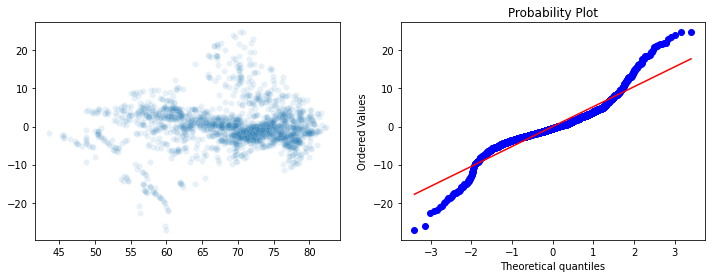

In [25]:
# Se calculan los errores
errors = (pipeline2.predict(X_train) - Y_train).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline2.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

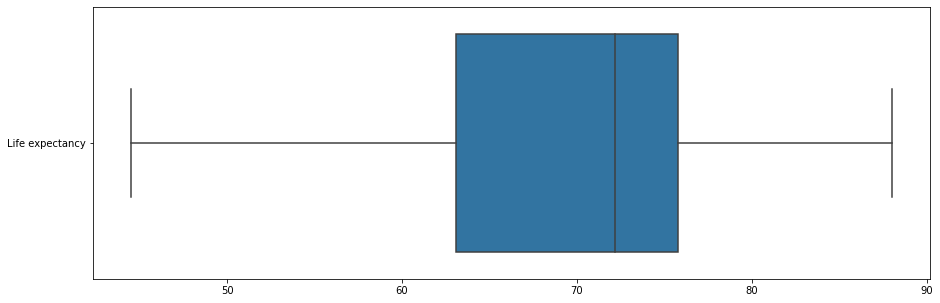

In [26]:
# Diagrama de caja
# Se ve que los datos ya están eliminados
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap2[['Life expectancy']], orient="h")

In [27]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline2.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #2 - Datos de entrenamiento
RMSE: 5.47
R²: 0.65


In [28]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline2.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #2 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #2 - Datos de test
RMSE: 5.73
R²: 0.65


### Pipeline 3: Se adicionan tranformaciones polinomiales

Este pipeline tiene los siguientes pasos:
1. Selección de variables (variable selected_cols)
2. Estandarización de los datos seleccionados
3. Transformaciones polinomiales
4. Modelado

In [29]:
# Se declara el modelo
model3 = [('model', LinearRegression())]

#Pre
pre = [('initial',ColumnTransformer([("selector", 'passthrough', selected_cols)])), 
       ('scaler', StandardScaler()),
       ('preprocessor', PolynomialFeatures(degree=4,interaction_only='True', include_bias=False)),]

# Se declara el pipeline
pipeline3 = Pipeline(pre+model3)

# Se extraen las variables explicativas y objetivo para entrenar
df_datap3 = df_data
X = df_datap3.drop('Life expectancy', axis = 1)
Y = df_datap3['Life expectancy']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline3 = pipeline3.fit(X_train,Y_train)

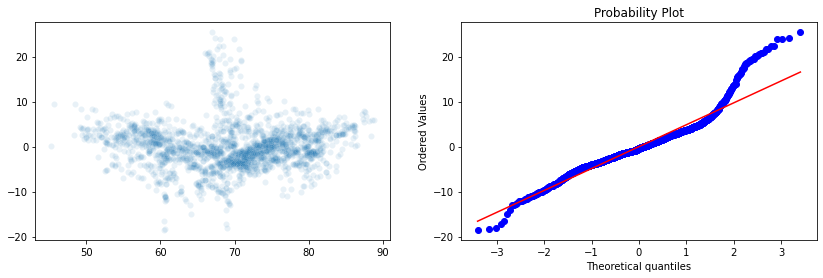

In [30]:
# Calculamos los errores
errors = (pipeline3.predict(X_train) - Y_train).values

fig, axes = plt.subplots(1, 2, figsize = (14,4))

# Dispersión
sns.scatterplot(x = pipeline3.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [31]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline3.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #3 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #3 - Datos de entrenamiento
RMSE: 5.04
R²: 0.73


In [32]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline3.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #3 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #3 - Datos de test
RMSE: 4.97
R²: 0.71


## 5. Evaluación cuantitativa

In [33]:
# Se ajusta el modelo para ver el reporte de estadísticas
model = sm.OLS(Y, X).fit()
# Se muestran las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          1.483e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        02:17:01   Log-Likelihood:                         -11131.
No. Observations:                2635   AIC:                                  2.227e+04
Df Residuals:                    2632   BIC:                                  2.229e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mortality                     0.0608      0.002     28.379      0.000       0.057       0.065
Income composition of resources    27.8110      2.685     10.357      0.000      22.545      33.077
Schooling                           3.3745      0.147     23.021      0.000       3.087       3.662
==============================================================================
Omnibus:                      892.087   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4629.698
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                       8.736   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Luego de realizar los 3 pipelines, se puede observar que con el último de estos se obtuvo el mejor resultado, tanto para los datos de entrenamiento como para los de test. En este último pipeline, se realizaron transformaciones polinomiales, lo que permitió aumentar en más de 0.05 el coeficiente R^2. Además, se logró disminuir el RMSE a 5 años en promedio, valor bastante bueno para el contexto del negocio.

Dado estos resultados, se recomienda instalar el modelo de estimación en producción, ya que este es bastante acertado. Sin embargo, dado el contexto del negocio y lo delicado que este es, se sugiere supervisar el modelo con expertos que validen estos resultados.

## 6. Evaluación cualitativa

Finalmente, se puede asegurar que el pipeline generado SÍ se cumplieron los objetivos de negocio. Por un lado, se pudo identificar las variables que más impactan en la expectativa de vida de la gente de los Alpes, siendo estas:
- Adult Mortality (tasa de mortalidad en personas entre 15 y 60 años de edad medida en muertes por cada 1000 habitantes)
- Income composition of resources (índice de desarrollo humano en términos de como usa sus recursos)
- Schooling (número de años que los niños van al colegio)

Estas variables son las que mayor impacto tienen sobre el modelo, siendo el 'Income composition of resources' la variable que más influye en los resultados. Cabe recalcar que todo esto está validado con la prueba t de Student, ya que el p-value de cada variable es lo suficientemente bajo para cualquier significancia usual.

Por otro lado, con el modelo se puede predecir con gran exactitud la expectativa de vida en los Alpes. En promedio, el modelo predice la expectativa de vida con un rango de +- 5 años respecto al valor real, algo bastante acertado teniendo en cuenta el contexto.

Finalmente, los reultados del modelo indican que este explica la variación en la variable objetivo con una proporción del 72% en promedio, un indicador bastante positivo y que motiva a implementar el modelo creado en producción en un contexto real.

## 7. Exportación de modelo

Se exporta el último pipeline (pipeline 3) para mandar a producción.

In [34]:
# Se guarda el pipeline en el archivo
filename = 'modelo.joblib' # Ubicación del archivo a entregar
dump(pipeline3, filename)

['modelo.joblib']

Para probar el pipeline creado, este se importa nuevamente, y se ejecuta con los datos de prueba

<AxesSubplot:ylabel='Count'>

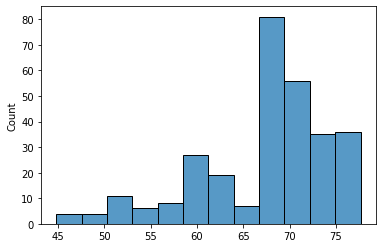

In [35]:
# Proceso de prueba del cliente
df_recent = pd.read_csv('202210_Laboratorio3_data_datos_recientes.csv') # Lectura de los datos recientes

# Se lee el archivo y carga el modelo
pipeline = load(filename)

y_predicted = pipeline.predict(df_recent)
sns.histplot(y_predicted)

Esta sería, a fin de cuentas, la predicción de los datos recientes con el pipeline creado. Posterior a esto, el negocio puede validar la predicción realizada con la columna que solo este tiene.